<a href="https://colab.research.google.com/github/Roaa-1/machine-learning/blob/master/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing Students' Performance in Secondary Education of Portuguese       Schools**

![portugal](https://d36tnp772eyphs.cloudfront.net/blogs/1/2011/05/portugal-1-1200x854.jpg)

## **Introduction**

### Education is the most important factor for countries to become highly advanced. Governments of all countries have a particular need for machine learning since they have many categories of data that can be mined to give them new insights.
### In the Education field, Machine learning can help to detect weaknesses and reduce them. In this project, we select a dataset of “Students Performance in Secondary Education” of two Portuguese schools in mathematics subject.
### The data attributes include student grades, demographic, social and school-related features and it was collected by using school reports and questionnaires.
### We classified these students into three categories, “Excellent”, “Good”, and “Fail”, according to their final exam performance. Then we analyzed a few features that have a significant influence on students' final performance. 

## **Problem Statement**

### In Portugal, statistics showed that there is a high failure rate of students in mathematics. We will analyze this case-study using a dataset of students' past grades. 

### ***The Question is:*** Can we in machine learning find a way to classify students' grades in a high accurate way as possible? And determine the most important factors that may affect the students in their final grade to enhance them?


## **Proposed Solution**

### We create various machine learning models to predict students' final performance (Grade), then we compare the models' performance based on accuracy score and other metrics.

##  

## **Evaluation metrics**



### 1.   *Precision*
### 2.   *Recall* 
### 3.   *Accuracy*





##  **LET'S GET STARTED!!...**

## **Exploratory Data Analysis (EDA)** 

<!-- ![alt text](https://i.imgur.com/fe9ziOW.png) --> 

**|| Importing the required libraries :-**

![alt text](https://i.pinimg.com/564x/94/64/a0/9464a0d12bf959adb8010320d4624861.jpg)

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing







**|| Importing the dataset :-**

In [ ]:
url='https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-mat.csv'
math=pd.read_csv(url,sep=';')



**|| The following code displayes the first 5 samples :-**

In [ ]:
math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


**|| The following code displayes the last 5 samples :-**

In [ ]:
math.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


**|| The following code displayes the dataset's information :-**

In [ ]:
math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [ ]:
math.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


* From the above displayed information we can tell that there's no missing values.

**|| The following code displayes the description of the dataset :-**

In [ ]:
math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


**|| The following code displayes the number of Females and Males students :-**

In [ ]:
math['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

**|| The following code displayes a grouping made based on the sex, and then finding the mean of the final grade for each :-**

In [ ]:
math.groupby('sex')['G3'].mean()

sex
F     9.966346
M    10.914439
Name: G3, dtype: float64

*-- From the previous output we can see that the males final grades are higher than the females!*

*(Coders' note: naah not buying it..femals always better in everything :) )*


## **Data Preparation**
*--"Data Pre-processing"*

![alt text](https://i.imgur.com/LsqthWS.png)

**|| The following code rename the columns :-**

In [ ]:
math.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']

*-- The following code is to check the success of the previous renaming code.*

In [ ]:
math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school                   395 non-null object
sex                      395 non-null object
age                      395 non-null int64
address                  395 non-null object
family_size              395 non-null object
parents_status           395 non-null object
mother_education         395 non-null int64
father_education         395 non-null int64
mother_job               395 non-null object
father_job               395 non-null object
reason                   395 non-null object
guardian                 395 non-null object
commute_time             395 non-null int64
study_time               395 non-null int64
failures                 395 non-null int64
school_support           395 non-null object
family_support           395 non-null object
paid_classes             395 non-null object
activities               395 non-null object
nursery                  395 non-null object
d

*-- The names of the dataset's columns changed successfully!*

**|| The following code will create a new column to convert the final score values to catagorical values**

In [ ]:
math['final_grade'] = 'na'
math.loc[(math.final_score >= 15) & (math.final_score <= 20), 'final_grade'] = 'Excelent' 
math.loc[(math.final_score >= 10) & (math.final_score <= 14), 'final_grade'] = 'Good' 
math.loc[(math.final_score >= 0) & (math.final_score <= 9), 'final_grade'] = 'Fail' 
math.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,commute_time,study_time,failures,school_support,family_support,paid_classes,activities,nursery,desire_higher_edu,internet,romantic,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,Fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,Fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,Good
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,Excelent
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,Good


**|| The following code shows the columns' names :-**

In [ ]:
math.columns.values

array(['school', 'sex', 'age', 'address', 'family_size', 'parents_status',
       'mother_education', 'father_education', 'mother_job', 'father_job',
       'reason', 'guardian', 'commute_time', 'study_time', 'failures',
       'school_support', 'family_support', 'paid_classes', 'activities',
       'nursery', 'desire_higher_edu', 'internet', 'romantic',
       'family_quality', 'free_time', 'go_out', 'weekday_alcohol_usage',
       'weekend_alcohol_usage', 'health', 'absences', 'period1_score',
       'period2_score', 'final_score', 'final_grade'], dtype=object)

**|| Now let's check for some missing values :-**

In [ ]:
math.isnull().any()

school                   False
sex                      False
age                      False
address                  False
family_size              False
parents_status           False
mother_education         False
father_education         False
mother_job               False
father_job               False
reason                   False
guardian                 False
commute_time             False
study_time               False
failures                 False
school_support           False
family_support           False
paid_classes             False
activities               False
nursery                  False
desire_higher_edu        False
internet                 False
romantic                 False
family_quality           False
free_time                False
go_out                   False
weekday_alcohol_usage    False
weekend_alcohol_usage    False
health                   False
absences                 False
period1_score            False
period2_score            False
final_sc

*-- COOL!! No missing values :)*

## **Data Visualisation**

![alt text](https://www.einfochips.com/blog/wp-content/uploads/2019/02/best-business-intelligence-and-data-visualization-tools-for-2019-featured.jpg)

**|| The following codes showes the relationship between the final grades and number of students using Countplot :-**

Text(0, 0.5, 'Number of Student')

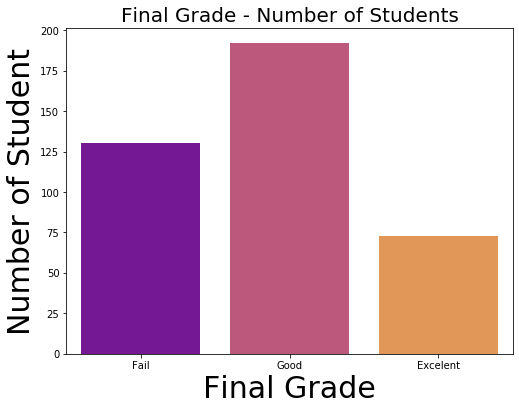

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(math.final_grade, order=["Fail","Good","Excelent"], palette='plasma')
plt.title('Final Grade - Number of Students',fontsize=20)
plt.xlabel('Final Grade', fontsize=30)
plt.ylabel('Number of Student', fontsize=30)

**|| The following code is a Correlation between the variables through a Correlation Heatmap, and it showes that the one with the highest correlation is  grades, followed by weekly and dialy alcohol consumption. :-**




Text(0.5, 1, 'Correlation Heatmap')

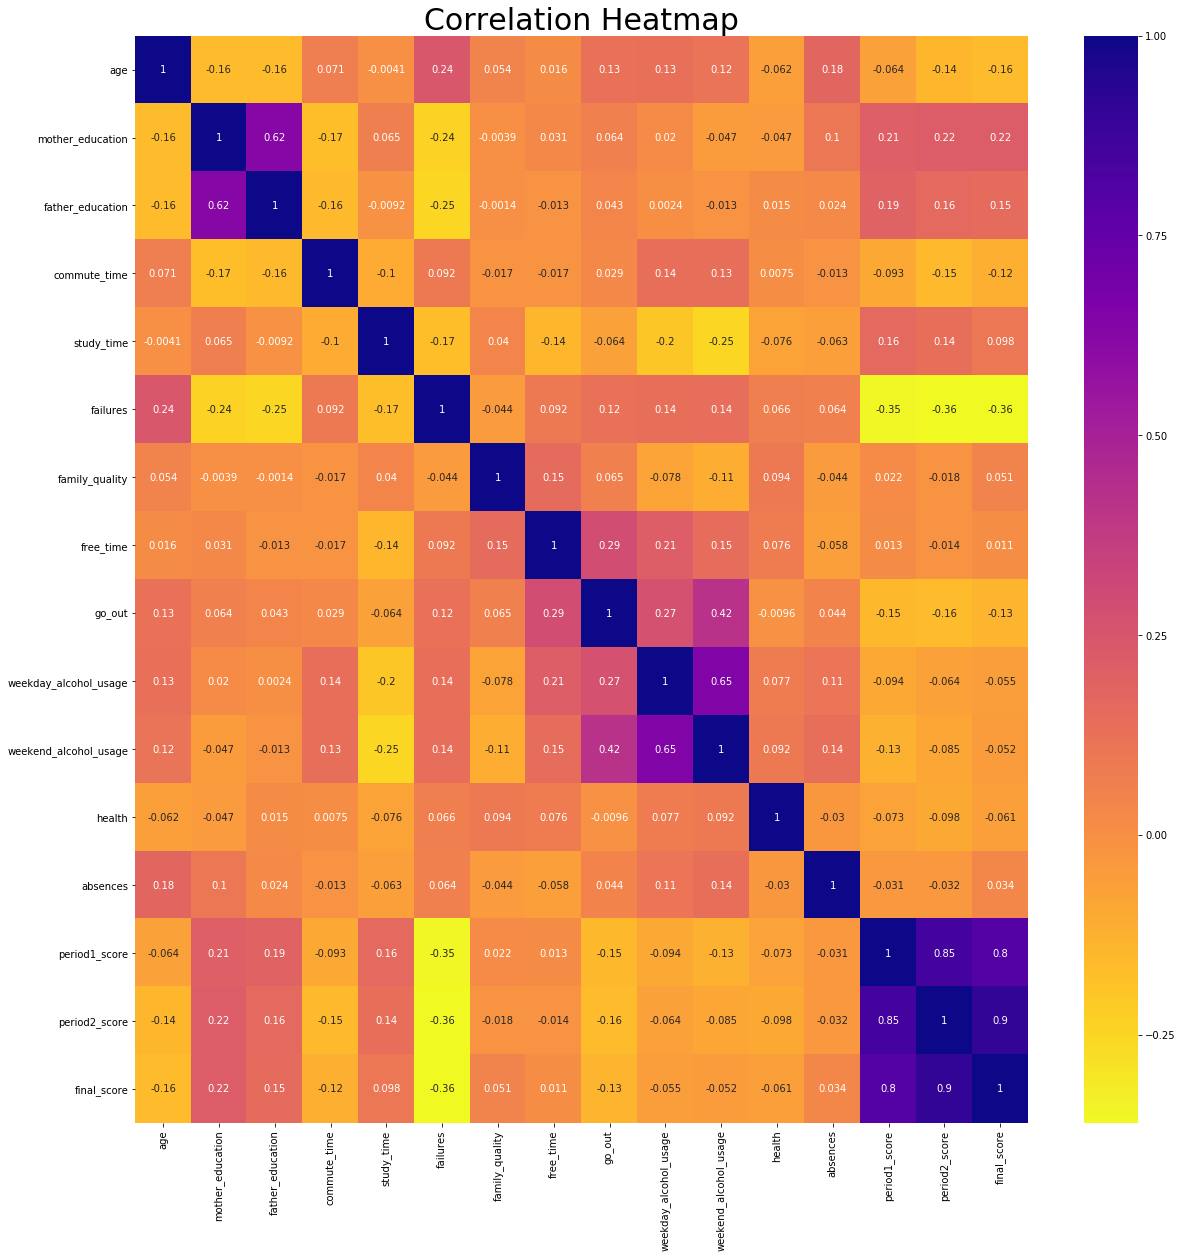

In [ ]:
corr = math.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="plasma_r")
plt.title('Correlation Heatmap', fontsize=30)

**|| The following code shows the correlation between the variables and the final score :-**

In [ ]:
new_corr = math.corr()
new_corr['final_score'].sort_values(ascending=False)

final_score              1.000000
period2_score            0.904868
period1_score            0.801468
mother_education         0.217147
father_education         0.152457
study_time               0.097820
family_quality           0.051363
absences                 0.034247
free_time                0.011307
weekend_alcohol_usage   -0.051939
weekday_alcohol_usage   -0.054660
health                  -0.061335
commute_time            -0.117142
go_out                  -0.132791
age                     -0.161579
failures                -0.360415
Name: final_score, dtype: float64

*-- As we see, the final score tends to go up as period2 score and  period1 score go up. final score has a tendency to fall with the Alcohol Consumption.*

**|| The following code will describe how the final grade as affected by romantic status, and we will see how students in a romantic relationship vs. those not in a relationship perform :-**

In [ ]:
perc = (lambda col: col/col.sum())
index = ['Fail','Good','Excelent']
romance_tab1 = pd.crosstab(index=math.final_grade, columns=math.romantic)
romance_tab = (romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)

<Figure size 432x288 with 0 Axes>

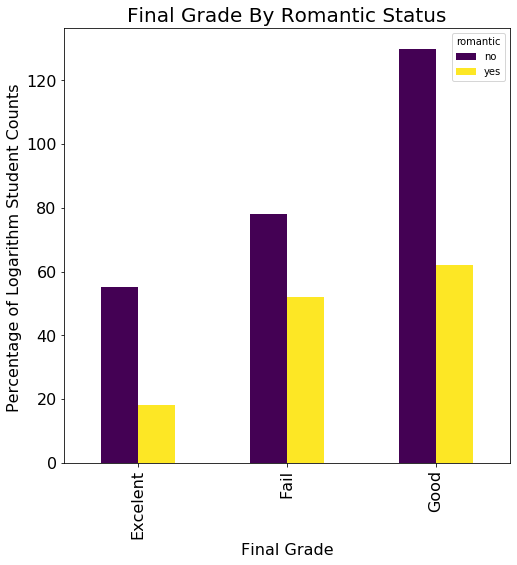

In [ ]:
plt.figure()
romance_tab.plot.bar(colormap="viridis", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Romantic Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

# Hypothesis Test

In [ ]:
import statsmodels.api as sm
romance_table = sm.stats.Table(romance_tab1)
romance_rslt = romance_table.test_nominal_association()
romance_rslt.pvalue

0.07582806500867012

**|| The following code shows the Final Grade By Alcohol Consumption, and we will see how alcohol consumption influences students' final grade :-**

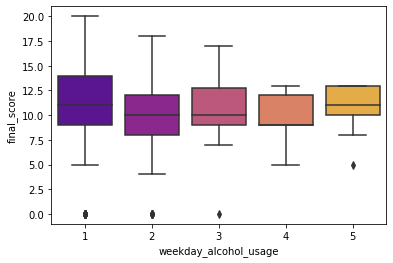

In [ ]:
sns.boxplot(x="weekday_alcohol_usage", y="final_score", data=math, palette='plasma' )

*-- we can see that majority of the students with the highest scores have the leaset alcohol consumption.*

**|| The following code is to show the final grade by frequency Of going out, and we will see how frequency of going out with friends influence students' final performance :-**

*-- going out with friends (numeric: from 1 - very low to 5 - very high)**

Text(0.5, 0, 'Frequency of Going Out')

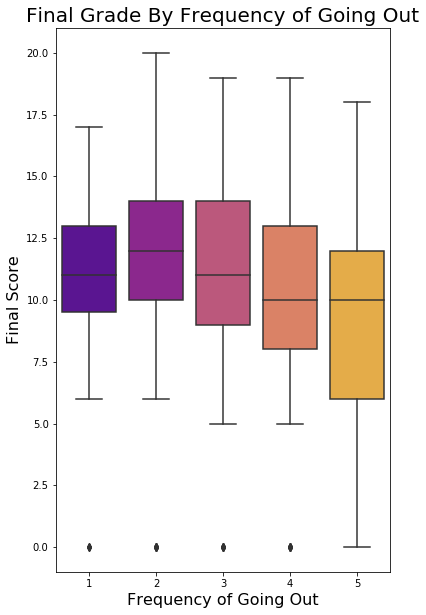

In [ ]:
plt.figure(figsize=(6,10))
sns.boxplot(x='go_out', y='final_score', data=math, palette='plasma')
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Final Score', fontsize=16)
plt.xlabel('Frequency of Going Out', fontsize=16)

Text(0.5, 0, 'Final Grade')

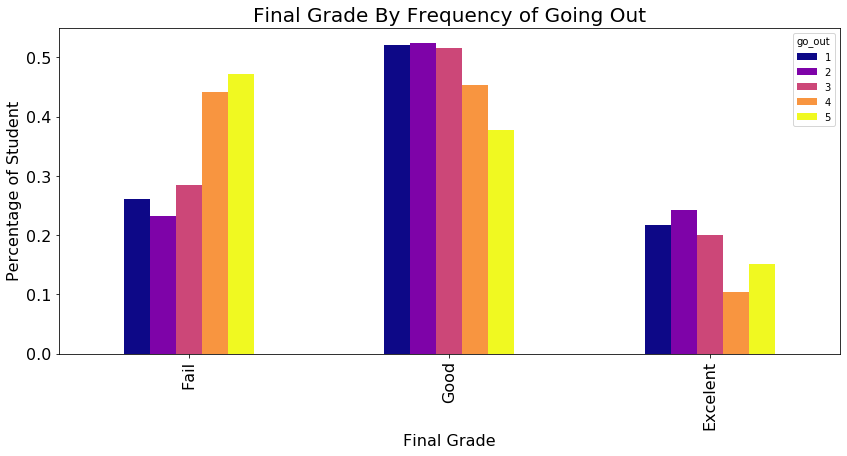

In [ ]:
out_tab = pd.crosstab(index=math.final_grade, columns=math.go_out)
out_perc = out_tab.apply(perc).reindex(index)

out_perc.plot.bar(colormap="plasma", fontsize=16, figsize=(14,6))
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

#Hyphothesis Testing 



In [ ]:
out_table = sm.stats.Table(out_tab)
out_rslt = out_table.test_nominal_association()
out_rslt.pvalue

0.02011679893175289

**|| The following code shows final grade by desire to go to college, and we will see how desire to go to college influence student final performance :-**



In [ ]:
higher_tab = pd.crosstab(index=math.final_grade, columns=math.desire_higher_edu)
higher_perc = higher_tab.apply(perc).reindex(index)

Text(0, 0.5, 'Percentage of Student')

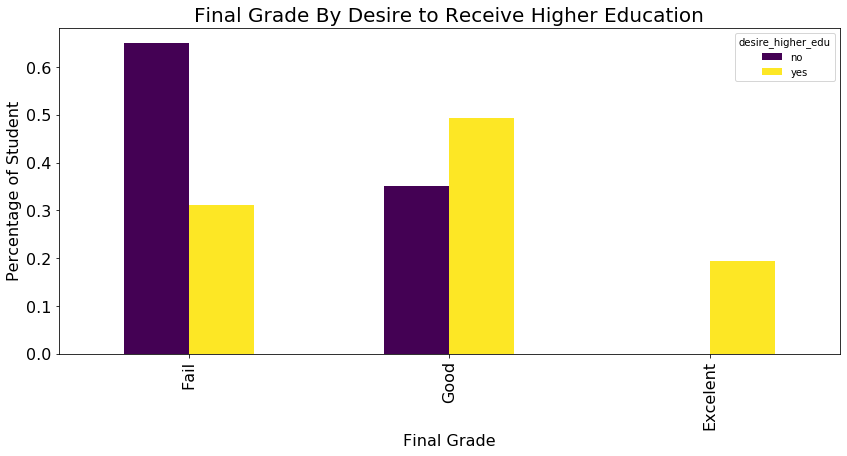

In [ ]:
higher_perc.plot.bar(colormap="viridis", figsize=(14,6), fontsize=16)
plt.title('Final Grade By Desire to Receive Higher Education', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

# Hypothesis Test

In [ ]:
higher_table = sm.stats.Table(higher_tab)
higher_rslt = higher_table.test_nominal_association()
higher_rslt.pvalue

0.006432095965317797

**|| The following code will show the final grade by the students' living area :-**

*-- living area: urban vs. rural.*

In [ ]:
math.address = math.address.map({'U':'Urban', 'R':'Rural'})

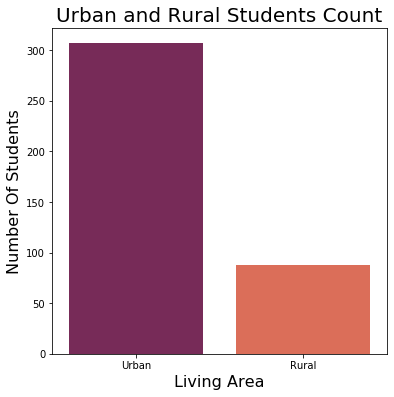

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(math.address, palette='rocket')
plt.title('Urban and Rural Students Count', fontsize=20)
plt.xlabel('Living Area', fontsize=16)
plt.ylabel('Number Of Students', fontsize=16)
plt.show()

In [ ]:
ad_tab1 = pd.crosstab(index=math.final_grade, columns=math.address)
ad_tab = np.log(ad_tab1)
ad_perc = ad_tab.apply(perc).reindex(index)

Text(0.5, 0, 'Final Grade')

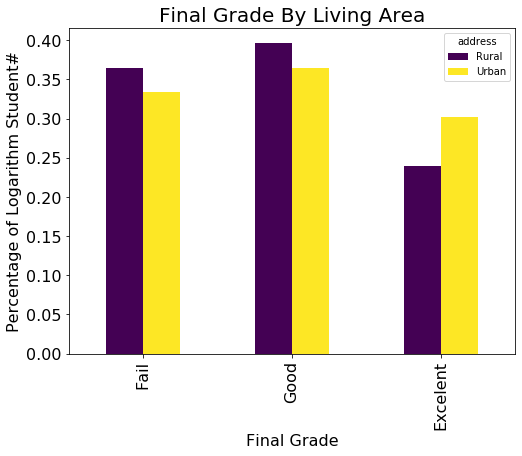

In [ ]:
ad_perc.plot.bar(colormap="viridis", fontsize=16, figsize=(8,6))
plt.title('Final Grade By Living Area', fontsize=20)
plt.ylabel('Percentage of Logarithm Student#', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

# Hyphothesis Testing 

*chi-square test result !*

In [ ]:
ad_table = sm.stats.Table(ad_tab1)
ad_rslt = ad_table.test_nominal_association()
ad_rslt.pvalue

0.13691116387177005

## **Classification**

![alt text](https://cdn3.iconfinder.com/data/icons/puzzles-and-directions/512/Arrows_seperating_arrows-01-512.png)


**|| Now we will prepare the dataset for modelling :-**

**We're creating a dataframe for classification :-**

In [ ]:
math2 = math.copy()
math2 = math2.drop([ 'final_score'], axis=1)

**|| Now we will encode the final grade :-**

In [ ]:
le = preprocessing.LabelEncoder()
math2.final_grade = le.fit_transform(math2.final_grade)

*-- the following code lists the classes of final garde column befor encoding :*

In [ ]:
le.classes_

array(['Excelent', 'Fail', 'Good'], dtype=object)

*-- The following code lists the encoded classes :*

In [ ]:
math2['final_grade'].unique()

array([1, 2, 0])

**|| We will start preparing the dataset to be classified by encoding all the catagorical variables :-**

In [ ]:
enc = LabelEncoder()
math2['father_job_enc']=enc.fit_transform(math2['father_job'])
math2['mother_job_enc']=enc.fit_transform(math2['mother_job'])
math2['parents_status_enc']=enc.fit_transform(math2['parents_status'])
math2['family_size_enc']=enc.fit_transform(math2['family_size'])
math2['address_enc']=enc.fit_transform(math2['address'])
math2['school_enc']=enc.fit_transform(math2['school'])
math2['sex_enc']=enc.fit_transform(math2['sex'])
math2['reason_enc']=enc.fit_transform(math2['reason'])
math2['guardian_enc']=enc.fit_transform(math2['guardian'])
math2['school_support_enc']=enc.fit_transform(math2['school_support'])
math2['family_support_enc']=enc.fit_transform(math2['family_support'])
math2['paid_classes_enc']=enc.fit_transform(math2['paid_classes'])
math2['activities_enc']=enc.fit_transform(math2['activities'])
math2['nursery_enc']=enc.fit_transform(math2['nursery'])
math2['desire_higher_edu_enc']=enc.fit_transform(math2['desire_higher_edu'])
math2['internet_enc']=enc.fit_transform(math2['internet'])
math2['romantic_enc']=enc.fit_transform(math2['romantic'])

**|| Drop all the unencoded columns :-**

In [ ]:
math2.drop(['school', 'address','sex','family_size', 'parents_status','mother_job','reason','father_job','guardian','school_support','family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic'], axis=1)

,age,mother_education,father_education,commute_time,study_time,failures,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_grade,father_job_enc,mother_job_enc,parents_status_enc,family_size_enc,address_enc,school_enc,sex_enc,reason_enc,guardian_enc,school_support_enc,family_support_enc,paid_classes_enc,activities_enc,nursery_enc,desire_higher_edu_enc,internet_enc,romantic_enc
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,1,4,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,1,2,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,2,2,0,1,1,1,0,0,2,1,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,0,3,1,1,0,1,0,0,1,1,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,2,2,2,1,0,1,0,0,1,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,1,3,3,0,1,1,1,1,0,2,0,1,1,0,1,1,0,0
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,0,3,3,1,1,1,1,1,0,1,0,0,0,0,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,1,2,2,1,0,0,1,1,0,2,0,0,0,0,0,1,0,0
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,2,2,3,1,1,0,1,1,0,1,0,0,0,0,0,1,1,0


**|| To move forward we need to split the dataset fist into training and testing datasets :-**

In [ ]:
X = math2.drop('final_grade',axis=1)
y = math2.final_grade
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

## **NOW LET THE FUN BEGIN ^ ^!**

![alt text](https://i.pinimg.com/564x/df/19/54/df1954ae304ffd5da7eb358ee9d076de.jpg)

**|| Pipline :-**

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehotenc', OneHotEncoder())])

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns


categorical_features = X.select_dtypes(include=['object']).columns



preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)])

**|| Applying RandomForest classifier :-**

In [ ]:
rf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier())])

In [ ]:
rf.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
rf.score(X_train, y_train)

0.9855072463768116

In [ ]:
rf.score(X_test, y_test)

0.7815126050420168

*-- The Accuracy :*

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7815126050420168

*-- Displying the metrics :*

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.73      0.82        22
           1       0.70      0.87      0.78        38
           2       0.80      0.75      0.77        59

    accuracy                           0.78       119
   macro avg       0.81      0.78      0.79       119
weighted avg       0.79      0.78      0.78       119



*-- Confusion matrix :-*

Confusion matrix:
 [[16  0  6]
 [ 0 33  5]
 [ 1 14 44]]


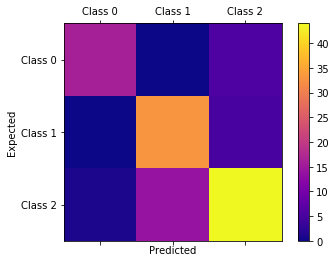

In [ ]:
conf_mat = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1','Class 2']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.plasma)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

**|| Applying the other classifiers. Such as KNeighborsClassifier, SVC, LogisticRegression, DecisionTreeClassifier, RandomForestClassifier and MLPClassifier :-**

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
model score: 0.563
accuracy score:  0.5630252100840336
classification report                precision    recall  f1-score   support

           0       0.40      0.45      0.43        22
           1       0.69      0.58      0.63        38
           2       0.56      0.59      0.58        59

    accuracy                           0.56       119
   macro avg       0.55      0.54      0.54       119
weighted avg       0.57      0.56      0.57       119

Confusion matrix:
 [[10  0 12]
 [ 1 22 15]
 [14 10 35]]


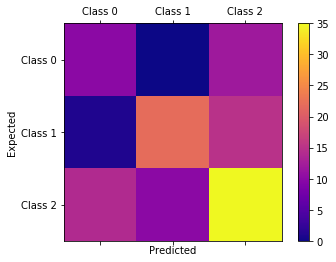

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
model score: 0.496
accuracy score:  0.4957983193277311
classification report                precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        38
           2       0.50      1.00      0.66        59

    accuracy                           0.50       119
   macro avg       0.17      0.33      0.22       119
weighted avg       0.25      0.50      0.33       119

Confusion matrix:
 [[ 0  0 22]
 [ 0  0 38]
 [ 0  0 59]]


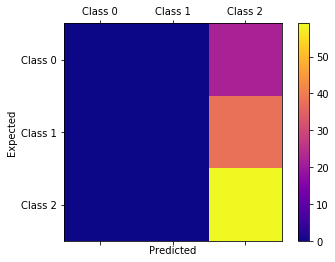

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
model score: 0.840
accuracy score:  0.8403361344537815
classification report                precision    recall  f1-score   support

           0       0.77      0.77      0.77        22
           1       0.87      0.89      0.88        38
           2       0.84      0.83      0.84        59

    accuracy                           0.84       119
   macro avg       0.83      0.83      0.83       119
weighted avg       0.84      0.84      0.84       119

Confusion matrix:
 [[17  0  5]
 [ 0 34  4]
 [ 5  5 49]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


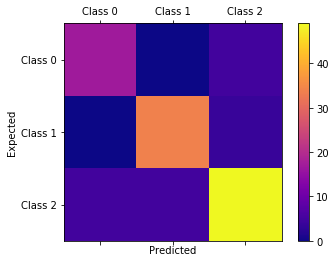

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
model score: 0.874
accuracy score:  0.8739495798319328
classification report                precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       0.84      0.84      0.84        38
           2       0.87      0.88      0.87        59

    accuracy                           0.87       119
   macro avg       0.89      0.88      0.88       119
weighted avg       0.87      0.87      0.87       119

Confusion matrix:
 [[20  0  2]
 [ 0 32  6]
 [ 1  6 52]]


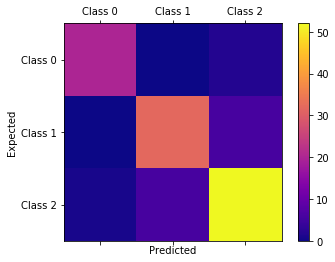

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
model score: 0.756
accuracy score:  0.7563025210084033
classification report                precision    recall  f1-score   support

           0       0.93      0.64      0.76        22
           1       0.72      0.76      0.74        38
           2       0.73      0.80      0.76        59

    accuracy                           0.76       119
   macro avg       0.80      0.73      0.75       119
weighted avg       0.77      0.76      0.76       119

Confusion matrix:
 [[14  0  8]
 [ 0 29  9]
 [ 1 11 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


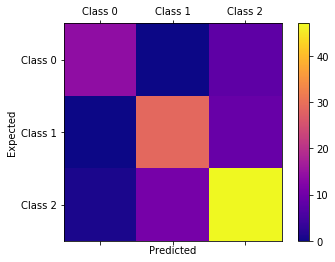

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
model score: 0.790
accuracy score:  0.7899159663865546
classification report                precision    recall  f1-score   support

           0       0.82      0.64      0.72        22
           1       0.83      0.79      0.81        38
           2       0.76      0.85      0.80        59

    accuracy                           0.79       119
   macro avg       0.80      0.76      0.78       119
weighted avg       0.79      0.79      0.79       119

Confusion matrix:
 [[14  0  8]
 [ 0 30  8]
 

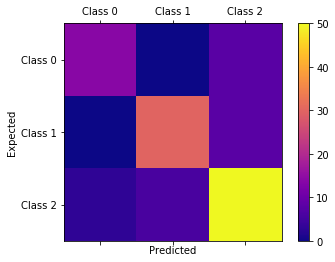

In [ ]:

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier()]
    
for classifier in classifiers:
    
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    
    pipe.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))
    
    y_pred = pipe.predict(X_test)

    print("accuracy score: ", metrics.accuracy_score(y_test, y_pred))

    print("classification report ", metrics.classification_report(y_test, y_pred))

    conf_mat = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
    print('Confusion matrix:\n', conf_mat)

    labels = ['Class 0', 'Class 1','Class 2']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(conf_mat, cmap=plt.cm.plasma)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('Expected')
    plt.show()

## **Based on the result of the accuracy of each classifier we decided that logistic regression is the best model since it has the highest accuracy...**

# References
https://archive.ics.uci.edu/ml/datasets/student+performance

https://machinelearningmastery.com/automate-machine-learning-workflows-pipelines-python-scikit-learn/

https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/amp/
